# SpaceShip Titanic predictor 
## Data Preprocessing

### Leonardo Gracida Muñoz A01379812
### Miguel Ángel Pérez López A01750145
### Luis Eduardo Gonzalez Quiroz A01751188
### Hayali Monserrt Marina Garduño A01749447
### Javier Emilio Moreno Márquez A01750400

In [74]:
!pip install -q kaggle

In [75]:
from google.colab import files

In [76]:
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"elio987","key":"a2e11a47619eb217a3db5838e066fdcd"}'}

In [77]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [78]:
!kaggle datasets list

ref                                                  title                                       size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------  -----------------------------------------  -----  -------------------  -------------  ---------  ---------------  
iamsouravbanerjee/house-rent-prediction-dataset      House Rent Prediction Dataset               82KB  2022-08-20 13:49:03           5313        176  1.0              
deepcontractor/mcdonalds-india-menu-nutrition-facts  McDonald's India : Menu Nutrition Dataset    5KB  2022-07-28 17:08:52           4707        175  0.9411765        
arianazmoudeh/airbnbopendata                         Airbnb Open Data                            10MB  2022-08-01 15:58:10           2957         92  0.9705882        
iamsouravbanerjee/world-population-dataset           World Population Dataset                    17KB  2022-08-31 11:20:04            730         53  1.0       

In [79]:
!kaggle competitions download -c spaceship-titanic

spaceship-titanic.zip: Skipping, found more recently modified local copy (use --force to force download)


In [80]:
!unzip /content/spaceship-titanic.zip -d "/content/kaggledb"

Archive:  /content/spaceship-titanic.zip
replace /content/kaggledb/sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: AA
  inflating: /content/kaggledb/sample_submission.csv  
  inflating: /content/kaggledb/test.csv  
  inflating: /content/kaggledb/train.csv  


In [81]:
import pandas as pd
df = pd.read_csv("/content/kaggledb/train.csv")

In [82]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


Checamos el tipo de dato de cada columna

In [83]:
df.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [84]:
df.shape

(8693, 14)

Checamos si hay valores vacios en cada una de las columnas

In [85]:
df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

Como en el reto de kaggle no esta permitido eliminar filas o entradas de datos completas, vamos a checar cuantas columnas se eliminarían si tienen datos faltantes

In [86]:
df1 = df.dropna(axis = 1,how = "any")
df1.shape

(8693, 2)

Como se eliminan muchas columnas vamos a optar por rellenar los datos faltantes, en el caso de los datos faltantes de variables numéricas vamos a usar la media, en el caso de las variables categóricas vamos a rellenar con la categoría que sea la moda.
<br>Primero llenamos las columnas numéricas

In [87]:
df2 = df.copy()
for i in df:
    if df[i].dtype == 'float64':
        i_mean = df[i].mean()
        df2[i] = df[i].fillna(i_mean)

Checamos si se llenaron estas categorías.

In [88]:
df2.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age               0
VIP             203
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
dtype: int64

Checamos las variables categóricas para ver si todas son útiles, o podemos eliminar alguna.

In [89]:
for i in df2:
    if df2[i].dtype == 'object':
        print(df2[i].value_counts())

0001_01    1
6136_01    1
6141_01    1
6139_06    1
6139_05    1
          ..
3126_01    1
3124_03    1
3124_02    1
3124_01    1
9280_02    1
Name: PassengerId, Length: 8693, dtype: int64
Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64
False    5439
True     3037
Name: CryoSleep, dtype: int64
G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: Cabin, Length: 6560, dtype: int64
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64
False    8291
True      199
Name: VIP, dtype: int64
Gollux Reedall        2
Elaney Webstephrey    2
Grake Porki           2
Sus Coolez            2
Apix Wala             2
                     ..
Jamela Griffy         1
Hardy Griffy          1
Salley Mckinn         1
Mall Frasp            1
Propsh Hontichre      1
Name: Name, Length: 8473, dtype: int64


En este caso vemos que hay columnas categóricas que contiene muchos datos diferentes o sólo una categoríay fila como el id de cada pasajero, el número de cabina y nombre. Es por eso que optamos por eliminarlas, ya que generarían una catidad de columnas que no nos dirían nada.
Al eliminarlas vemos las variables que quedan y checamos cuantas categorías tienen.

In [90]:
df2 = df2.drop(["PassengerId","Cabin","Name"], axis = 1)
for i in df2:
    if df2[i].dtype == 'object':
        print(df2[i].value_counts())

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64
False    5439
True     3037
Name: CryoSleep, dtype: int64
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64
False    8291
True      199
Name: VIP, dtype: int64


Rellenamos los datos faltantes de las variables categóricas con su moda

In [91]:
from sklearn_pandas import CategoricalImputer
import numpy as np
imputer = CategoricalImputer()
data = np.array(df2[["CryoSleep","VIP"]], dtype=object)
df2[["HomePlanet","Destination"]] = df2[["HomePlanet","Destination"]].apply(lambda x: x.fillna(x.value_counts().index[0]))
df2[["CryoSleep","VIP"]] = imputer.fit_transform(data)

In [92]:
for i in df2:
    if df2[i].dtype == 'object':
        print(df2[i].value_counts())

Earth     4803
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64
False    5656
True     3037
Name: CryoSleep, dtype: int64
TRAPPIST-1e      6097
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64
False    8494
True      199
Name: VIP, dtype: int64


Verficamos que no haya datos vacíos

In [93]:
df2.isna().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

In [94]:
df2.value_counts()

HomePlanet  CryoSleep  Destination  Age   VIP    RoomService  FoodCourt  ShoppingMall  Spa   VRDeck  Transported
Earth       False      TRAPPIST-1e  0.0   False  0.0          0.0        0.0           0.0   0.0     True           28
            True       TRAPPIST-1e  0.0   False  0.0          0.0        0.0           0.0   0.0     True           25
Mars        False      TRAPPIST-1e  0.0   False  0.0          0.0        0.0           0.0   0.0     True           25
Earth       True       TRAPPIST-1e  18.0  False  0.0          0.0        0.0           0.0   0.0     True           22
Mars        True       TRAPPIST-1e  18.0  False  0.0          0.0        0.0           0.0   0.0     True           22
                                                                                                                    ..
Earth       False      TRAPPIST-1e  34.0  False  44.0         1290.0     51.0          0.0   9.0     False           1
                                                 34.0 

# Distribución de los datos numéricos

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  """


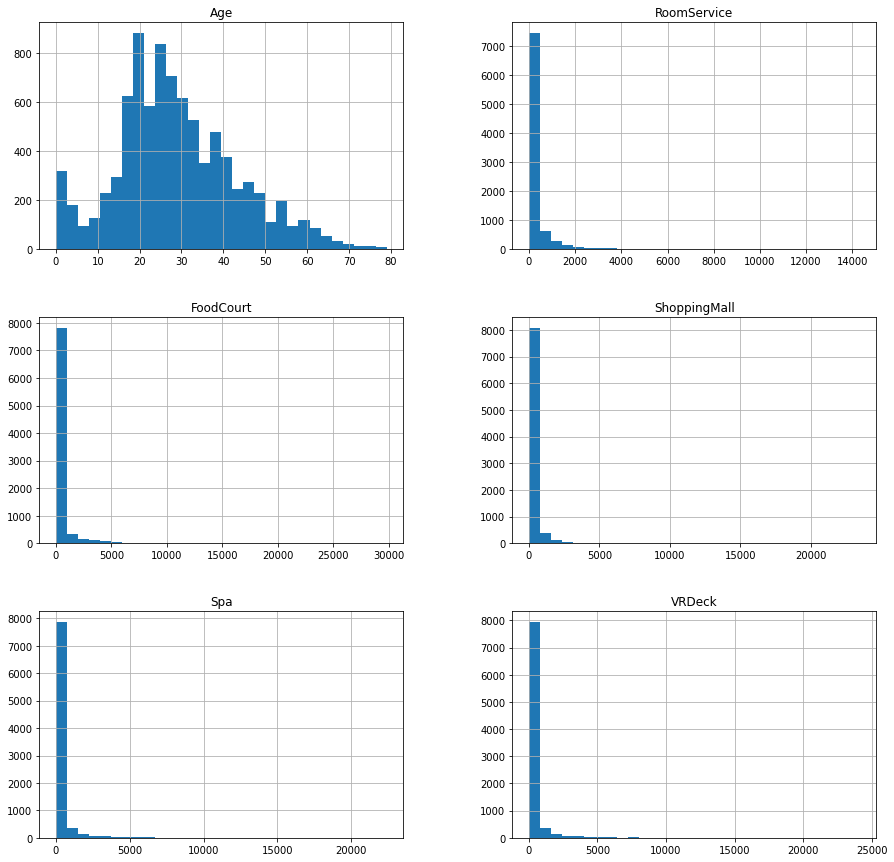

In [95]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15, 15))
ax = fig.gca()

df2[["Age","RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]].hist(ax = ax, bins=30)
plt.show()

#Checado y eliminacion de outliers
Vamos a usar gráficas de boxplot aara checar si hay outliers. Como el límite para considerar un outlier es relativo, vamos a checar los valores que considera como outliers para ver hasta donde sería bueno poner el límite.

# Age
En este caso no vamos a considerar ninguno outlier por que estos puntos están muy juntos y puede haber personas de 80 años de edad

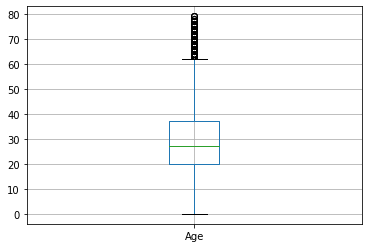

In [96]:
import statsmodels.api as sm
df2[["Age"]].boxplot()

En el caso de los demás si vamos a mover el limite hasta donde veamos valores muy solos o muy alejados, volviendolos a declarar como la media de cada columna. Esto para no eliminar una fila

# Roomservice

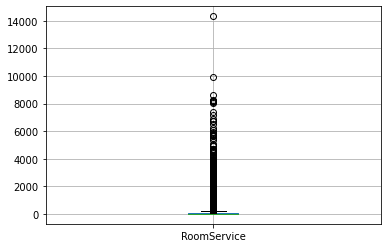

In [97]:
df2[["RoomService"]].boxplot()

In [98]:
df2.loc[df2["RoomService"] > 12000,"RoomService"] = df2["RoomService"].mean()

# FoodCourt

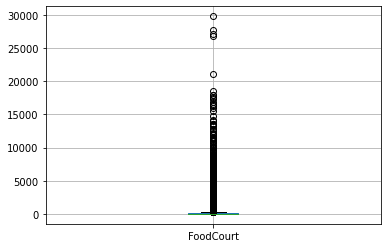

In [99]:
df2[["FoodCourt"]].boxplot()

In [100]:
df2.loc[df2["FoodCourt"] > 25000,"FoodCourt"] = df2["FoodCourt"].mean()

# ShoppingMall

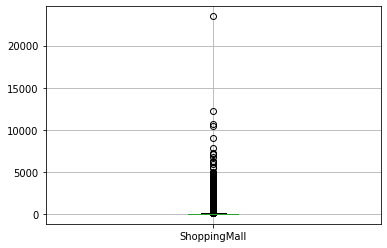

In [101]:
df2[["ShoppingMall"]].boxplot()

In [102]:
df2.loc[df2["ShoppingMall"] > 20000,"ShoppingMall"] = df2["ShoppingMall"].mean()

# Spa

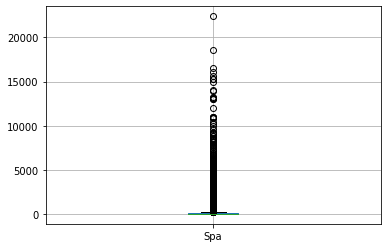

In [103]:
df2[["Spa"]].boxplot()

In [104]:
df2.loc[df2["Spa"] > 17000,"Spa"] = df2["Spa"].mean()

# VRDeck

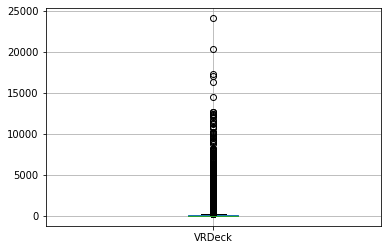

In [105]:
df2[["VRDeck"]].boxplot()

In [106]:
df2.loc[df2["VRDeck"] > 2000,"VRDeck"] = df2["VRDeck"].mean()

# Eliminacion de outliers

En este caso vamos a eliminar los outliers predeterminados, solo para observar el comportamiento de los mismos.

In [107]:
dstats = df2[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].describe().T
dstats

,count,mean,std,min,25%,50%,75%,max
RoomService,8693.0,223.065357,642.162858,0.0,0.0,0.0,78.0,9920.0
FoodCourt,8693.0,445.468818,1481.858621,0.0,0.0,0.0,118.0,21066.0
ShoppingMall,8693.0,171.046750,542.534631,0.0,0.0,0.0,45.0,12253.0
Spa,8693.0,306.496224,1081.820486,0.0,0.0,0.0,89.0,16594.0
VRDeck,8693.0,135.938565,313.779757,0.0,0.0,0.0,71.0,1989.0


In [108]:
qrtl = {
        'RoomService' : [dstats.loc['RoomService', '25%'], dstats.loc['RoomService', '75%']],
        'FoodCourt' : [dstats.loc['FoodCourt', '25%'], dstats.loc['FoodCourt', '75%']],
        'ShoppingMall'  : [dstats.loc['ShoppingMall', '25%'], dstats.loc['ShoppingMall', '75%']],
        'Spa': [dstats.loc['Spa', '25%'], dstats.loc['Spa', '75%']],
        'VRDeck': [dstats.loc['VRDeck', '25%'], dstats.loc['VRDeck', '75%']],
       }

In [109]:
filt1 = ( 
          df2['RoomService'].between(
                            qrtl['RoomService'][0] - 1.5*(qrtl['RoomService'][1] - qrtl['RoomService'][0]), 
                            qrtl['RoomService'][1] + 1.5*(qrtl['RoomService'][1] - qrtl['RoomService'][0])
                          ) 
        )

filt2 = ( 
          df2['FoodCourt'].between(
                            qrtl['FoodCourt'][0] - 1.5*(qrtl['FoodCourt'][1] - qrtl['FoodCourt'][0]), 
                            qrtl['FoodCourt'][1] + 1.5*(qrtl['FoodCourt'][1] - qrtl['FoodCourt'][0])
                          ) 
        )

filt3 = ( 
          df2['ShoppingMall'].between(
                            qrtl['ShoppingMall'][0] - 1.5*(qrtl['ShoppingMall'][1] - qrtl['ShoppingMall'][0]), 
                            qrtl['ShoppingMall'][1] + 1.5*(qrtl['ShoppingMall'][1] - qrtl['ShoppingMall'][0])
                          ) 
        )

filt4 = ( 
          df2['Spa'].between(
                            qrtl['Spa'][0] - 1.5*(qrtl['Spa'][1] - qrtl['Spa'][0]), 
                            qrtl['Spa'][1] + 1.5*(qrtl['Spa'][1] - qrtl['Spa'][0])
                          ) 
        )

filt5 = ( 
          df2['VRDeck'].between(
                            qrtl['VRDeck'][0] - 1.5*(qrtl['VRDeck'][1] - qrtl['VRDeck'][0]), 
                            qrtl['VRDeck'][1] + 1.5*(qrtl['VRDeck'][1] - qrtl['VRDeck'][0])
                          ) 
        )

In [110]:
data = df2[filt1 & filt2 & filt3 & filt4 & filt5].copy()
data.shape

(3250, 11)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


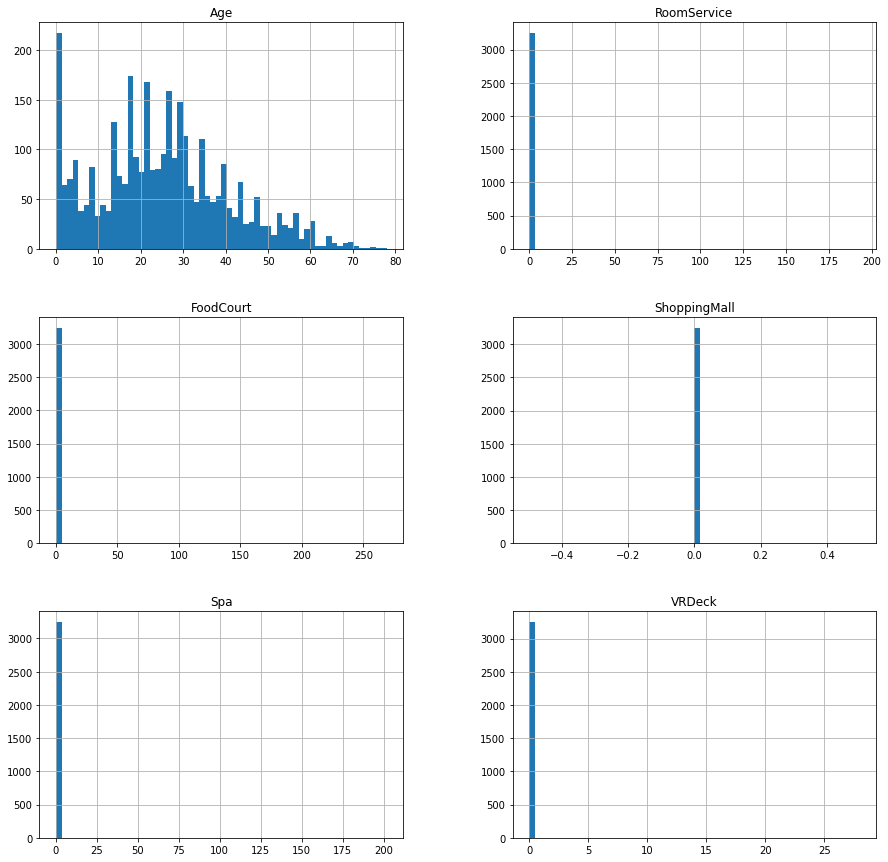

In [111]:
fig = plt.figure(figsize=(15, 15))
ax = fig.gca()

data[["Age","RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]].hist(ax = ax, bins=60)
plt.show()

Al eliminarlos vemos que estos técnicamente se mantienen en cero o cerca de cero. Podemos observar que la mayoria de las personas no gastaron dinero en el Titanic. Es por eso que vamos a basar la predicción en las variables categóricas y la edad del pasajero.

# Cambio de variables categóricas a variables numéricas.

Como vimos anteriormente hay dos variables con solo dos categorías, que son CryoSleep y VIP. Usaremos label encoder en esas dos variables para que sean 0 o 1. En las demás variables hay muchas categorías por lo que usaremos dummy variables.

# Transformacion de variable categóricas a numéricas

In [112]:
df2.dtypes

HomePlanet       object
CryoSleep        object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Transported        bool
dtype: object

In [113]:
for i in df2:
    if df2[i].dtype == 'object':
        print(df2[i].value_counts())

Earth     4803
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64
False    5656
True     3037
Name: CryoSleep, dtype: int64
TRAPPIST-1e      6097
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64
False    8494
True      199
Name: VIP, dtype: int64


Usamos el laber encoder para poder cambiar las variables con solo dos categorías

In [114]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
le_cat = ["CryoSleep","VIP","Transported"]
for i in le_cat:
    df2[i]=label_encoder.fit_transform(df2[i]) 

In [115]:
df2.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,0,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,0
1,Earth,0,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,1
2,Europa,0,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0
3,Europa,0,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0
4,Earth,0,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,1


Para las variables con más de dos categorías usamos dummy variables para poder agregar una columna pr cada una de las categorías.

In [116]:
dummy_cat = ["HomePlanet","Destination"]
for i in dummy_cat:
    dummies = pd.get_dummies(df2[i])
    df2 = pd.concat([df2.drop(columns=[i]), dummies], axis=1)

Al final obtenemos el dataset final y está listo para poder entrenar el modelo

In [117]:
df2.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Earth,Europa,Mars,55 Cancri e,PSO J318.5-22,TRAPPIST-1e
0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,1
1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1,1,0,0,0,0,1
2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,0,1,0,0,0,1
3,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,0,1,0,0,0,1
4,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1,1,0,0,0,0,1


In [118]:
from google.colab import drive
drive.mount("/content/gdrive")  

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [119]:
df2.to_csv('/content/gdrive/MyDrive/titanic_train.csv')  

Test <br>
Para el testeo vamos a hacer lo mismo que en el train, vamos a llenar los datos faltantes con la media de la dataset de test y la moda de cada variable categorica.

In [120]:
df = pd.read_csv("/content/kaggledb/test.csv")

In [122]:
df2 = df.copy()
for i in df:
    if df[i].dtype == 'float64':
        i_mean = df[i].mean()
        df2[i] = df[i].fillna(i_mean)

In [123]:
df2 = df2.drop(["PassengerId","Cabin","Name"], axis = 1)
for i in df2:
    if df2[i].dtype == 'object':
        print(df2[i].value_counts())

Earth     2263
Europa    1002
Mars       925
Name: HomePlanet, dtype: int64
False    2640
True     1544
Name: CryoSleep, dtype: int64
TRAPPIST-1e      2956
55 Cancri e       841
PSO J318.5-22     388
Name: Destination, dtype: int64
False    4110
True       74
Name: VIP, dtype: int64


In [124]:
df2.shape

(4277, 10)

In [125]:
imputer = CategoricalImputer()
data = np.array(df2[["CryoSleep","VIP"]], dtype=object)
df2[["HomePlanet","Destination"]] = df2[["HomePlanet","Destination"]].apply(lambda x: x.fillna(x.value_counts().index[0]))
df2[["CryoSleep","VIP"]] = imputer.fit_transform(data)

In [126]:
label_encoder = LabelEncoder()
le_cat = ["CryoSleep","VIP"]
for i in le_cat:
    df2[i]=label_encoder.fit_transform(df2[i]) 

In [127]:
dummy_cat = ["HomePlanet","Destination"]
for i in dummy_cat:
    dummies = pd.get_dummies(df2[i])
    df2 = pd.concat([df2.drop(columns=[i]), dummies], axis=1)

In [129]:
df2.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Earth,Europa,Mars,55 Cancri e,PSO J318.5-22,TRAPPIST-1e
0,1,27.0,0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,1
1,0,19.0,0,0.0,9.0,0.0,2823.0,0.0,1,0,0,0,0,1
2,1,31.0,0,0.0,0.0,0.0,0.0,0.0,0,1,0,1,0,0
3,0,38.0,0,0.0,6652.0,0.0,181.0,585.0,0,1,0,0,0,1
4,0,20.0,0,10.0,0.0,635.0,0.0,0.0,1,0,0,0,0,1


In [130]:
df2.to_csv('/content/gdrive/MyDrive/titanic_test.csv')  